In [1]:
import tensorflow as tf

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam , SGD

In [2]:
vgg = tf.keras.applications.VGG16(
    input_shape = [100,100,3],
    include_top = False,
    weights = 'imagenet'
)

58889256/58889256 [==============================] - 0s 0us/step


In [3]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 100, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 100, 100, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 100, 100, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 50, 50, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 50, 50, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 50, 50, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 25, 25, 128)       0     

In [4]:
x = Flatten()(vgg.output)
x = Dense(4, activation = 'sigmoid')(x)
model = Model(vgg.input, x)

In [6]:
def image_generator(batch_size = 64):
  # generate images and targets
  while True:

    for _ in range(50):
      X = np.zeros((batch_size, 100, 100, 3))
      Y = np.zeros((batch_size, 4))

      for i in range(batch_size):
        row0 = np.random.randint(90)
        col0 = np.random.randint(90)

        row1 = np.random.randint(row0, 100)
        col1 = np.random.randint(col0, 100)
        X[i, row0:row1, col0:col1,:] = 1
        Y[i,0] = row0/100
        Y[i,1]= col0/100
        Y[i,2] = (row1-row0)/100
        Y[i,3] = (col1-col0)/100

      yield X,Y


In [8]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(learning_rate = 0.001
                     )
)

In [9]:
model.fit_generator(
    image_generator(),
    steps_per_epoch = 50,
    epochs =10
)

Epoch 1/10


<ipython-input-9-f463017ff8d9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


50/50 [==============================] - 24s 174ms/step - loss: 0.7500
Epoch 2/10
50/50 [==============================] - 9s 175ms/step - loss: 0.5176
Epoch 3/10
50/50 [==============================] - 9s 178ms/step - loss: 0.5088
Epoch 4/10
50/50 [==============================] - 9s 180ms/step - loss: 0.5086
Epoch 5/10
50/50 [==============================] - 9s 180ms/step - loss: 0.5086
Epoch 6/10
50/50 [==============================] - 9s 182ms/step - loss: 0.5083
Epoch 7/10
50/50 [==============================] - 9s 183ms/step - loss: 0.5044
Epoch 8/10
50/50 [==============================] - 9s 181ms/step - loss: 0.5071
Epoch 9/10
50/50 [==============================] - 9s 179ms/step - loss: 0.5044
Epoch 10/10
50/50 [==============================] - 9s 178ms/step - loss: 0.5029


In [12]:
from matplotlib.patches import Rectangle

# Make Predictions
def make_predictions():
  x = np.zeros((100,100,3))
  row0 = np.random.randint(90)
  col0 = np.random.randint(90)
  row1 = np.random.randint(row0, 100)
  col1 = np.random.randint(col0, 100)
  x[row0:row1, col0:col1,:] =1
  print(row0, col0, row1, col1)

  # Predict
  X = np.expand_dims(x, 0)
  p = model.predict(X)[0]

  # Draw the box
  fig, ax = plt.subplots(1)
  ax.imshow(x)
  rect = Rectangle(
      (p[1]*100, p[0]*100),
      p[3]*100, p[2]*100, linewidth = 1, edgecolor = 'r', facecolor = 'none'
  )
  ax.add_patch(rect)
  plt.show()


74 47 90 86
1/1 [==============================] - 0s 18ms/step


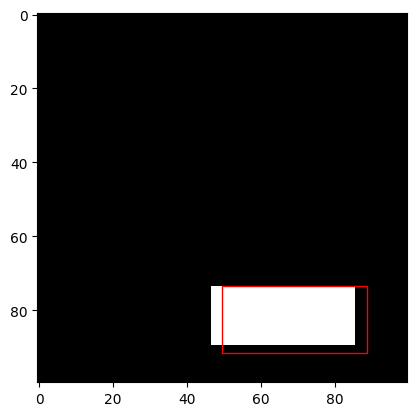

In [13]:
make_predictions()

In [14]:
from tensorflow.keras.preprocessing import image

In [15]:
!wget -nc https://lazyprogrammer.me/course_files/charmandar-tight.png

--2024-04-23 04:05:24--  https://lazyprogrammer.me/course_files/charmandar-tight.png
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3030::ac43:d5a6, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 404 Not Found
2024-04-23 04:05:25 ERROR 404: Not Found.



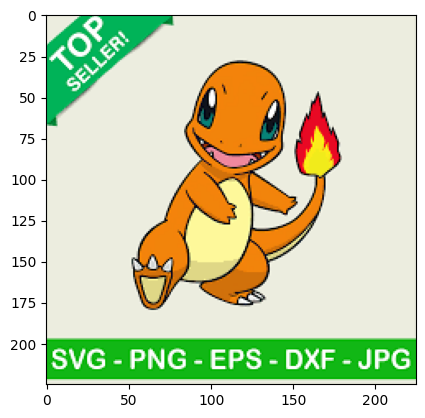

In [64]:
ch = image.load_img('/content/char.png')
plt.imshow(ch)
plt.show()

In [65]:
np.array(ch).shape

(225, 225, 3)

In [66]:
from imageio import imread

In [85]:
POKE_DIM = 200

In [86]:
def pokemon_generator(batch_size=64):
    while True:
        for _ in range(50):
            X = np.zeros((batch_size, POKE_DIM, POKE_DIM, 3))
            Y = np.zeros((batch_size, 4))

            for i in range(batch_size):
                # Calculate valid range for col0 and row0
                max_col0 = max(0, POKE_DIM - CH_W)
                max_row0 = max(0, POKE_DIM - CH_H)

                if max_col0 == 0:
                    col0 = 0
                else:
                    col0 = np.random.randint(max_col0)

                if max_row0 == 0:
                    row0 = 0
                else:
                    row0 = np.random.randint(max_row0)

                row1 = min(row0 + CH_H, POKE_DIM)
                col1 = min(col0 + CH_W, POKE_DIM)

                # Ensure dimensions of ch fit within X[i]
                ch_height, ch_width, _ = ch.shape
                height_to_use = min(CH_H, ch_height)
                width_to_use = min(CH_W, ch_width)

                X[i, row0:row0 + height_to_use, col0:col0 + width_to_use, :] = ch[:height_to_use, :width_to_use, :3]
                Y[i, 0] = row0 / POKE_DIM
                Y[i, 1] = row1 / POKE_DIM
                Y[i, 2] = (row1 - row0) / POKE_DIM
                Y[i, 3] = (col1 - col0) / POKE_DIM

            yield X / 255., Y


In [87]:
def make_model():
  vgg = tf.keras.applications.VGG16(
      input_shape = [POKE_DIM,POKE_DIM,3],
      include_top = False,
      weights = 'imagenet'
  )

  x = Flatten()(vgg.output)
  x= Dense(4, activation = 'sigmoid')(x)
  model = Model(vgg.input, x)
  model.compile(loss = 'binary_crossentropy', optimizer = Adam()
                )
  return model

In [89]:

def pokemon_generator(batch_size=64):
    while True:
        for _ in range(50):
            X = np.zeros((batch_size, POKE_DIM, POKE_DIM, 3))
            Y = np.zeros((batch_size, 4))

            for i in range(batch_size):
                # Insert debugging print statements
                print("CH shape:", ch.shape)  # Check the shape of ch
                print("POKE_DIM:", POKE_DIM)
                print("CH_H:", CH_H)
                print("CH_W:", CH_W)

                # Your existing code for generating X and Y...

                yield X / 255., Y

# Define the model creation function
def make_model():
    vgg = VGG16(
        input_shape=[POKE_DIM, POKE_DIM, 3],
        include_top=False,
        weights='imagenet'
    )

    x = Flatten()(vgg.output)
    x = Dense(4, activation='sigmoid')(x)
    model = Model(vgg.input, x)
    model.compile(loss='binary_crossentropy', optimizer=Adam())
    return model

# Initialize model and start training
model = make_model()
model.fit_generator(
    pokemon_generator(), steps_per_epoch=50, epochs=25
)


<ipython-input-89-d5f85699fbea>:43: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(


AttributeError: shape

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def pokemon_prediction():
    x = np.zeros((POKE_DIM, POKE_DIM, 3))
    row0 = np.random.randint(POKE_DIM - CH_H)
    max_col0 = max(0, POKE_DIM - CH_W)  # Ensure non-negative value for max_col0
    col0 = np.random.randint(max_col0) if max_col0 > 0 else 0  # Set col0 to 0 if max_col0 is 0
    row1 = row0 + CH_H
    col1 = col0 + CH_W

    x[row0:row1, col0:col1, :] = ch[:, :, :3]
    print("true:", row0, col0, row1, col1)

    X = np.expand_dims(x, 0) / 255.
    p = model.predict(X)[0]

    y = np.zeros(4)
    y[0] = row0 / POKE_DIM
    y[1] = col0 / POKE_DIM
    y[2] = (row1 - row0) / POKE_DIM
    y[3] = (col1 - col0) / POKE_DIM

    # Draw the box
    row0_pred = int(p[0] * POKE_DIM)
    col0_pred = int(p[1] * POKE_DIM)
    row1_pred = int(row0_pred + p[2] * POKE_DIM)
    col1_pred = int(col0_pred + p[3] * POKE_DIM)
    print("pred:", row0_pred, col0_pred, row1_pred, col1_pred)

    fig, ax = plt.subplots()
    ax.imshow(x.astype(np.uint8))
    rect = Rectangle(
        (col0_pred, row0_pred),
        p[3] * POKE_DIM, p[2] * POKE_DIM,
        linewidth=1, edgecolor='r', facecolor='none'
    )
    ax.add_patch(rect)
    plt.show()

pokemon_prediction()


TypeError: 'Image' object is not subscriptable

In [60]:
pokemon_generator()

<generator object pokemon_generator at 0x7e0b73708820>

In [62]:
pokemon_prediction()

ValueError: high <= 0